Primer paso: Importación de pandas

In [45]:
import pandas as pd

Se importan los datasets

In [46]:
games = pd.read_csv("data/games.csv")
champs = pd.read_csv("data/champs.csv")

Pequeña visualización de los datasets importados

In [47]:
games.head(5)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [48]:
champs.head(5)

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


Game Id nos sirve de índice, al igual que el id de champs. Por ello, los convertiré en sus respectivos índices

In [49]:
games = games.set_index('gameId')
champs = champs.set_index('id')

Previsualización de las primeras líneas para ver si se ha cumplido correctamente

In [50]:
games.head(1)

,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,...,5,0,0,1,1,114,67,43,16,51


In [51]:
champs.head(1)

,name
id,
24,Jax


Siguiente paso: Eliminación de las columnas superfluas

In [52]:
# El resto de columnas me las quedaré por si acaso
games = games.drop(['seasonId'], axis=1)

Paso siguiente: Detección de NA's

In [154]:
games.isna().any()

creationTime          False
gameDuration          False
winner                False
firstBlood            False
firstTower            False
firstInhibitor        False
firstBaron            False
firstDragon           False
firstRiftHerald       False
t1_towerKills         False
t1_inhibitorKills     False
t1_baronKills         False
t1_dragonKills        False
t1_riftHeraldKills    False
t2_towerKills         False
t2_inhibitorKills     False
t2_baronKills         False
t2_dragonKills        False
t2_riftHeraldKills    False
t1_c1                 False
t1_c2                 False
t1_c3                 False
t1_c4                 False
t1_c5                 False
t2_c1                 False
t2_c2                 False
t2_c3                 False
t2_c4                 False
t2_c5                 False
t1_c1_s1              False
t1_c1_s2              False
t1_c2_s1              False
t1_c2_s2              False
t1_c3_s1              False
t1_c3_s2              False
t1_c4_s1            

Siguiente paso: Conversión del tiempo Unix en fecha legible

In [54]:
games.creationTime = pd.to_datetime(games.creationTime, unit='ms')

In [55]:
games.head(2)

,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,8,...,5,0,0,1,1,114,67,43,16,51
3229566029,2017-06-19 05:06:43.862,1851,1,1,1,1,0,1,1,119,...,2,0,0,0,0,11,67,238,51,420


Ahora tenemos todos los datos sin NA's, la fecha convertida, las columnas innecesarias de primeras quitadas, y los dataframes correctamente indexados

Siguiente paso: Sustitución del número de los campeones por el nombre de los campeones en sí

In [56]:
games = games.merge(champs, left_on='t1_champ1id', right_on='id', how='left' )
games = games.merge(champs, left_on='t1_champ2id', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c1", "name_y": "t1_c2"})

games = games.merge(champs, left_on='t1_champ3id', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t1_champ4id', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c3", "name_y": "t1_c4"})

games = games.merge(champs, left_on='t1_champ5id', right_on='id', how='left' )
games = games.merge(champs, left_on='t2_champ1id', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c5", "name_y": "t2_c1"})

games = games.merge(champs, left_on='t2_champ2id', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t2_champ3id', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c2", "name_y": "t2_c3"})

games = games.merge(champs, left_on='t2_champ4id', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t2_champ5id', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c4", "name_y": "t2_c5"})

# Ahora que tenemos todo renombrado y bonito, podemos eliminar las columnas que nos han servido para joinear

games = games.drop(['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
                    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id'],
                   axis=1)

In [57]:
games.head(1)

,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,...,t1_c1,t1_c2,t1_c3,t1_c4,t1_c5,t2_c1,t2_c2,t2_c3,t2_c4,t2_c5
0,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,12,...,Vladimir,Bard,KogMaw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh


Ahora se tiene que hacer lo mismo con las summoner spells

In [58]:
summonerSpells = pd.read_json("data/summoner_spell_info.json")
summonerSpells = summonerSpells.transpose()
summonerSpells = summonerSpells.set_index("id")

# Se borran las columnas innecesarias

summonerSpells = summonerSpells.drop(['description', 'key', 'summonerLevel'], axis=1)

summonerSpells.head(2)

,name
id,
1,Cleanse
3,Exhaust


In [59]:
# Una vez que se tiene el dataset correctamente hecho, se procede como en la vez anterior para poner los nombres en vez de los códigos

games = games.merge(summonerSpells, left_on='t1_champ1_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t1_champ1_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c1_s1", "name_y": "t1_c1_s2"})

games = games.merge(summonerSpells, left_on='t1_champ2_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t1_champ2_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c2_s1", "name_y": "t1_c2_s2"})

games = games.merge(summonerSpells, left_on='t1_champ3_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t1_champ3_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c3_s1", "name_y": "t1_c3_s2"})

games = games.merge(summonerSpells, left_on='t1_champ4_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t1_champ4_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c4_s1", "name_y": "t1_c4_s2"})

games = games.merge(summonerSpells, left_on='t1_champ5_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t1_champ5_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_c5_s1", "name_y": "t1_c5_s2"})

games = games.merge(summonerSpells, left_on='t2_champ1_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t2_champ1_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c1_s1", "name_y": "t2_c1_s2"})

games = games.merge(summonerSpells, left_on='t2_champ2_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t2_champ2_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c2_s1", "name_y": "t2_c2_s2"})

games = games.merge(summonerSpells, left_on='t2_champ3_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t2_champ3_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c3_s1", "name_y": "t2_c3_s2"})

games = games.merge(summonerSpells, left_on='t2_champ4_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t2_champ4_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c4_s1", "name_y": "t2_c4_s2"})

games = games.merge(summonerSpells, left_on='t2_champ5_sum1', right_on='id', how='left' )
games = games.merge(summonerSpells, left_on='t2_champ5_sum2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_c5_s1", "name_y": "t2_c5_s2"})

# Ahora que se tiene todo renombrado y bonito, se pueden eliminar las columnas que nos han servido para joinear

games = games.drop(['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2',
                    't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
                    't1_champ5_sum1', 't1_champ5_sum2', 't2_champ1_sum1', 't2_champ1_sum2',
                    't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
                    't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2'],
                   axis=1)

games.head(1)

,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,...,t2_c1_s1,t2_c1_s2,t2_c2_s1,t2_c2_s2,t2_c3_s1,t2_c3_s2,t2_c4_s1,t2_c4_s2,t2_c5_s1,t2_c5_s2
0,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,11,...,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust


Ahora hay que hacer lo mismo con los bans de ambos equipos, volviendo al dataframe de los champs

In [60]:
games = games.merge(champs, left_on='t1_ban1', right_on='id', how='left' )
games = games.merge(champs, left_on='t1_ban2', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_b1", "name_y": "t1_b2"})

games = games.merge(champs, left_on='t1_ban3', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t1_ban4', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_b3", "name_y": "t1_b4"})

games = games.merge(champs, left_on='t1_ban5', right_on='id', how='left' )
games = games.merge(champs, left_on='t2_ban1', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t1_b5", "name_y": "t2_b1"})

games = games.merge(champs, left_on='t2_ban2', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t2_ban3', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_b2", "name_y": "t2_b3"})

games = games.merge(champs, left_on='t2_ban4', right_on='id', how='left' ) 
games = games.merge(champs, left_on='t2_ban5', right_on='id', how='left' )

games = games.rename(columns={"name_x": "t2_b4", "name_y": "t2_b5"})

# Ahora que tenemos todo renombrado y bonito, podemos eliminar las columnas que nos han servido para joinear

games = games.drop(['t1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5',
                    't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5'],
                   axis=1)

games.head(1)

,creationTime,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,...,t1_b1,t1_b2,t1_b3,t1_b4,t1_b5,t2_b1,t2_b2,t2_b3,t2_b4,t2_b5
0,2017-09-01 15:24:17.970,1949,1,2,1,1,1,1,2,11,...,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn


Conversión de los datos categóricos en dicho tipo

In [61]:
for col in ['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
            't1_c1', 't1_c2', 't1_c3', 't1_c4', 't1_c5', 't2_c1', 't2_c2', 't2_c3', 't2_c4', 't2_c5',
            't1_b1', 't1_b2', 't1_b3', 't1_b4', 't1_b5', 't2_b1', 't2_b2', 't2_b3', 't2_b4', 't2_b5',
            't1_c1_s1', 't1_c1_s2', 't1_c2_s1', 't1_c2_s2', 't1_c3_s1', 't1_c3_s2', 't1_c4_s1', 't1_c4_s2', 't1_c5_s1', 't1_c5_s2',
            't2_c1_s1', 't2_c1_s2', 't2_c2_s1', 't2_c2_s2', 't2_c3_s1', 't2_c3_s2', 't2_c4_s1', 't2_c4_s2', 't2_c5_s1', 't2_c5_s2']:
    
    games[col] = games[col].astype('category')
    
games.dtypes

creationTime          datetime64[ns]
gameDuration                   int64
winner                      category
firstBlood                  category
firstTower                  category
firstInhibitor              category
firstBaron                  category
firstDragon                 category
firstRiftHerald             category
t1_towerKills                  int64
t1_inhibitorKills              int64
t1_baronKills                  int64
t1_dragonKills                 int64
t1_riftHeraldKills             int64
t2_towerKills                  int64
t2_inhibitorKills              int64
t2_baronKills                  int64
t2_dragonKills                 int64
t2_riftHeraldKills             int64
t1_c1                       category
t1_c2                       category
t1_c3                       category
t1_c4                       category
t1_c5                       category
t2_c1                       category
t2_c2                       category
t2_c3                       category
t

Los datos ahora están correctamente categorizados

In [62]:
games.to_csv(r'data/games_clean.csv')

ANÁLISIS DE LOS DATOS

1) Campeones más utilizados

In [124]:
dict = {}
for columna in games.columns[19: 29]:
    dict[columna] = games[columna].value_counts()

champs_used = dict["t1_c1"] + dict["t1_c2"] + dict["t1_c3"] + dict["t1_c4"] + dict["t1_c5"] + dict["t2_c1"] + dict["t2_c2"] + dict["t2_c3"] + dict["t2_c4"] + dict["t2_c5"]
    
champs_used.head()

Aatrox      753
Ahri       6316
Akali      2949
Alistar    3476
Amumu      2312
dtype: int64

In [64]:
print("El campeón que más se ha usado se ha escogido {:.2f} veces más que el menos usado" .format(champs_used.values.max() / champs_used.values.min()) )

El campeón que más se ha usado se ha escogido 22.65 veces más que el menos usado


In [65]:
# Cálculo del campeón más usado
champs_used[champs_used.values == champs_used.values.max()]

Thresh    13002
dtype: int64

In [66]:
# Cálculo del campeón menos usado
champs_used[champs_used.values == champs_used.values.min()]

Skarner    574
dtype: int64

In [70]:
# Para la visualización de esto se puede sacar un WordCloud

# import sys
#!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

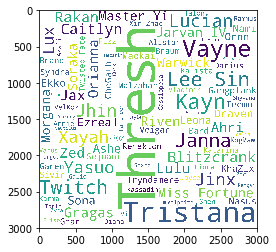

In [81]:
wc_picks = WordCloud(background_color="white", width=3000,height=3000, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(champs_used)
plt.imshow(wc_picks)

In [82]:
wc_picks.to_file("imagenes/wordcloudPicks.png")

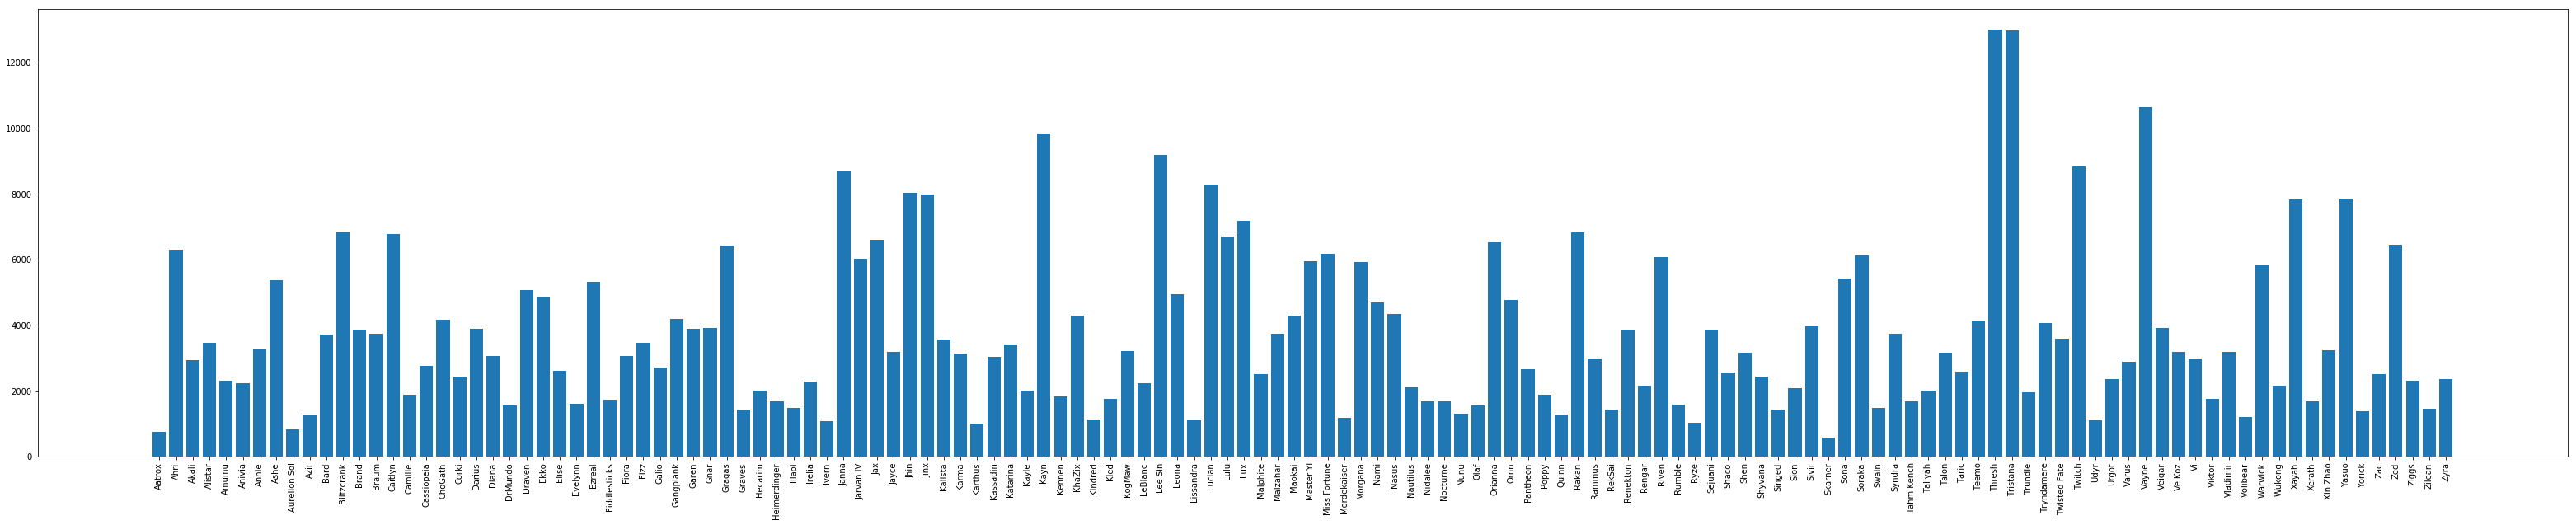

In [121]:
# A continuación, un gráfico de barras para mostrarlo más detalladamente:

plt.bar(range(len(champs_used)), list(champs_used.get_values()), align='center')
plt.rcParams["figure.figsize"] = [55,10]
plt.xticks(range(len(champs_used)), list(champs_used.keys()), rotation='vertical')
plt.savefig('imagenes/barplot Campeones Usados.png')

plt.show()

Finalmente, voy a calcular el porcentaje de picks por partida del campeón más usado: Thresh

In [122]:
champs_used.values.max() / len(games)

0.25251505146630415

De este primer apartado se pueden sacar una serie de conclusiones:

1. Thresh es el campeón más utilizado

2. Se usa a Thresh en una de cada cuatro partidas

3. Thresh y Tristana son cogidos con diferencia por encima del resto, de tal manera que en la botlane normalemente habrá uno de los dos al menos

2) Camepones más baneados

Para el análisis de esta segunda parte seguiré una forma similar, puesto que en este caso es descubrir cuales son los campeones más prohibidos en las partidas.
Dada la gran afluencia de Thresh y Tristana, parece ser que la gente le gusta mucho jugarles, de tal manera que puede ser que sean bastante prohibidos en la pre partida con tal de perjudicar al equipo rival.

In [127]:
# Primer paso: Obtención de la cantidad de bans por campeón:

dict_bans = {}
for columna in games.columns[49: 59]:
    dict_bans[columna] = games[columna].value_counts()

champs_banned = dict_bans["t1_b1"] + dict_bans["t1_b2"] + dict_bans["t1_b3"] + dict_bans["t1_b4"] + dict_bans["t1_b5"] + dict_bans["t2_b1"] + dict_bans["t2_b2"] + dict_bans["t2_b3"] + dict_bans["t2_b4"] + dict_bans["t2_b5"]
    
champs_banned.head()

Aatrox      712
Ahri       4481
Akali      4501
Alistar     696
Amumu       587
dtype: int64

In [130]:
# Comprobación del campeón más baneado

champs_banned[champs_banned.values == champs_banned.values.max()]

Yasuo    33015
dtype: int64

No es sorpresa que Yasuo sea uno de los campeones más baneados, puesto que es uno de los campeones más odiados por la comunidad de jugadores

In [131]:
# Comprobación del campeón menos baneado

champs_banned[champs_banned.values == champs_banned.values.min()]

Skarner    70
dtype: int64

In [132]:
# Ratio entre el más y el menos baneado

print("El campeón que más se ha baneado se ha prohibido {:.2f} veces más que el menos usado" .format(champs_banned.values.max() / champs_banned.values.min()) )

El campeón que más se ha baneado se ha prohibido 471.64 veces más que el menos usado


Es interesante que no sean ni Thresh ni Tristana los más baneados. Veamos a ver cuantos bans tienen

In [133]:
champs_banned['Thresh']

5867

In [134]:
champs_banned['Tristana']

13067

Veamos en wordclouds y en gráficos como está la cantidad de bans

wc_bans = WordCloud(background_color="white", width=3000,height=3000, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(champs_banned)
plt.imshow(wc_bans)

In [150]:
wc_bans.to_file("imagenes/wordcloudBans.png")

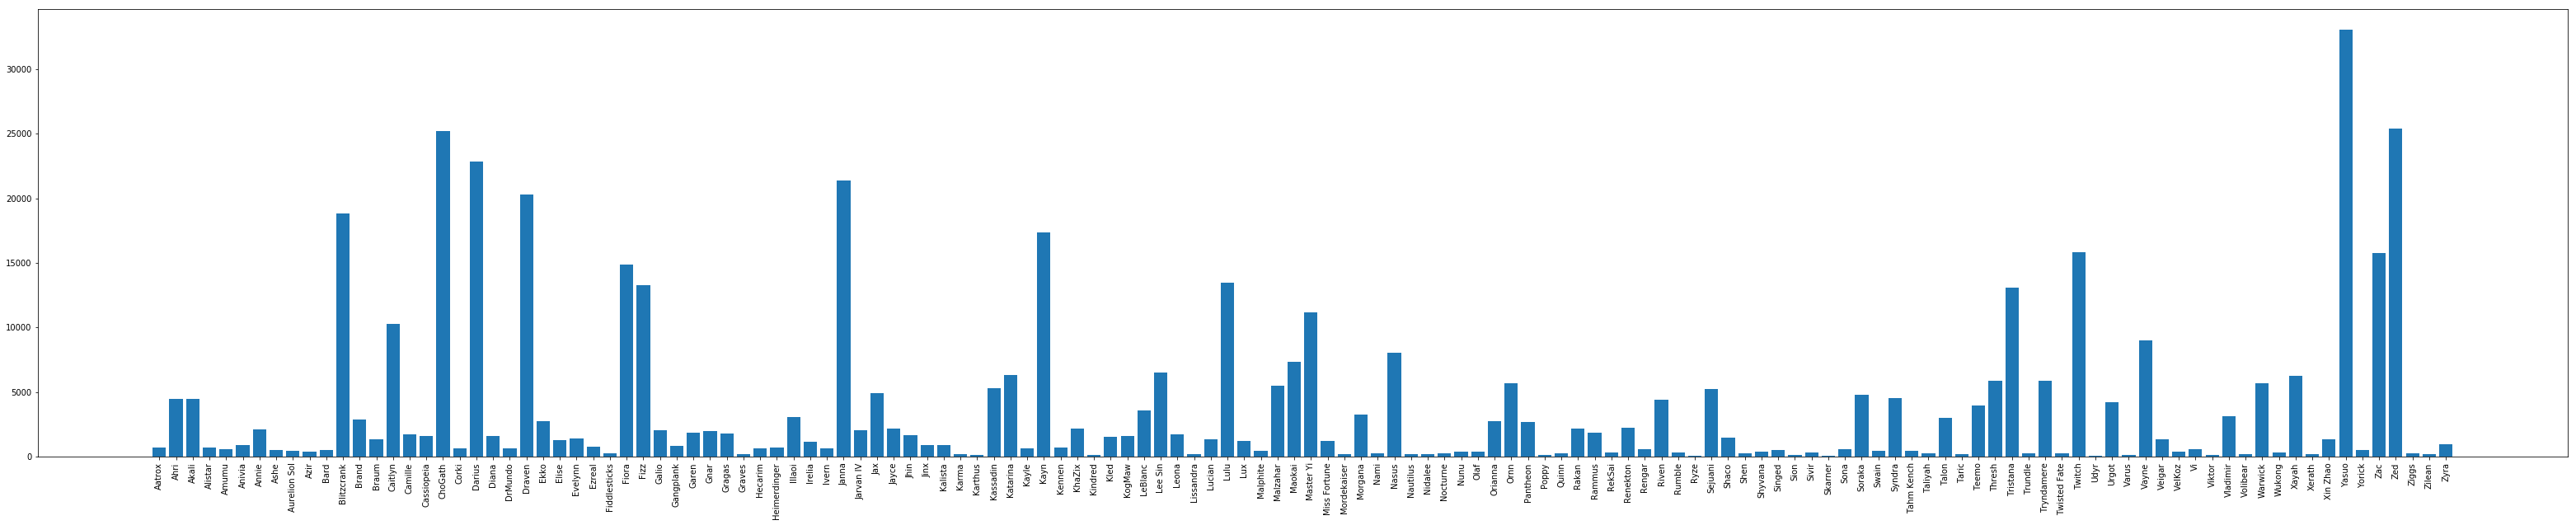

In [151]:
plt.bar(range(len(champs_banned)), list(champs_banned.get_values()), align='center')
plt.rcParams["figure.figsize"] = [55,10]
plt.xticks(range(len(champs_banned)), list(champs_banned.keys()), rotation='vertical')
plt.savefig('imagenes/barplot Campeones Baneados.png')

plt.show()

3) Ratio Victoria de Campeones

Una de las cosas más a tener en cuenta es con qué campeones se suelen ganar más partidas. Esto debería de tener relación con los picks y los bans de la gente, puesto que
se supone que intentar escoger campeones que deban de ganar un alto porcentaje de partidas y deberían de prohibir (banear) hacia el otro equipo campeones que tengan otro 
alto porcenaje de partidas ganadas. De esta forma, vamos a ver si esto se cumple o no.

In [222]:
# Para hacer este paso, hay que comprobar qué equipo ganó la partida, y según eso comprobar los campeones que la formaban.
# Posteriormente, sumaremos la cantidad de victorias que tiene cada campeón partido por las partidas que haya jugado, y obtendremos los porcentajes.

# Paso 1: Obtención de las partidas en las que ganó el equipo 1 y en las que ganó el equipo 2

df_t1 = games[games.winner == 1]
df_t2 = games[games.winner == 2]


In [171]:
# Una vez hecho esto, me quedo con las columnas de los campeones usados en dichas partidas por dicho equipo

df_t1_champs = df_t1[['t1_c1', 't1_c2', 't1_c3', 't1_c4', 't1_c5']]
df_t1_champs.head(2)

,t1_c1,t1_c2,t1_c3,t1_c4,t1_c5
0,Vladimir,Bard,KogMaw,Master Yi,Viktor
1,Draven,Irelia,Nidalee,Kayle,Shaco


In [172]:
df_t2_champs = df_t2[['t2_c1', 't2_c2', 't2_c3', 't2_c4', 't2_c5']]
df_t2_champs.head(2)

,t2_c1,t2_c2,t2_c3,t2_c4,t2_c5
8,Twitch,Jarvan IV,Lux,Kayn,Brand
9,Shaco,Varus,Heimerdinger,Lux,Garen


In [224]:
# Cuantas veces aparecen los nombres en cada dataframe

dict_names_win_t1 = {}
for columna in df_t1_champs.columns:
    dict_names_win_t1[columna] = df_t1_champs[columna].value_counts()

champs_win_t1 = dict_names_win_t1["t1_c1"] + dict_names_win_t1["t1_c2"] + dict_names_win_t1["t1_c3"] + dict_names_win_t1["t1_c4"] + dict_names_win_t1["t1_c5"]
    
champs_win_t1.head()

Aatrox      183
Ahri       1702
Akali       734
Alistar     883
Amumu       578
dtype: int64

In [225]:
dict_names_win_t2 = {}
for columna in df_t2_champs.columns:
    dict_names_win_t2[columna] = df_t2_champs[columna].value_counts()

champs_win_t2 = dict_names_win_t2["t2_c1"] + dict_names_win_t2["t2_c2"] + dict_names_win_t2["t2_c3"] + dict_names_win_t2["t2_c4"] + dict_names_win_t2["t2_c5"]
    
champs_win_t2.head()

Aatrox      171
Ahri       1593
Akali       750
Alistar     841
Amumu       600
dtype: int64

In [226]:
# una vez que se tienen estas cantidades, vamos a sumarlas para ver cuantas victorias tienen en total los campeones

champs_win_total = champs_win_t1 + champs_win_t2
champs_win_total.head()

Aatrox      354
Ahri       3295
Akali      1484
Alistar    1724
Amumu      1178
dtype: int64

In [227]:
# Como algunos campeones se han usado más que otros, es normal que algunos tengan más wins que otros. Para ponerlos todos al mismo nivel,
# lo justo es calcular el winrate de cada campeón para así ver cuales tienen mayores posibilidades de ganar

winrate_champs = champs_win_total / champs_used
winrate_champs.head()

Aatrox     0.470120
Ahri       0.521691
Akali      0.503221
Alistar    0.495972
Amumu      0.509516
dtype: float64

In [239]:
# Campeón que más gana
winrate_champs[winrate_champs.values == winrate_champs.values.max()]

Janna    0.555287
dtype: float64

In [241]:
# Campeón que menos gana
winrate_champs[winrate_champs.values == winrate_champs.values.min()]

Ryze    0.407946
dtype: float64

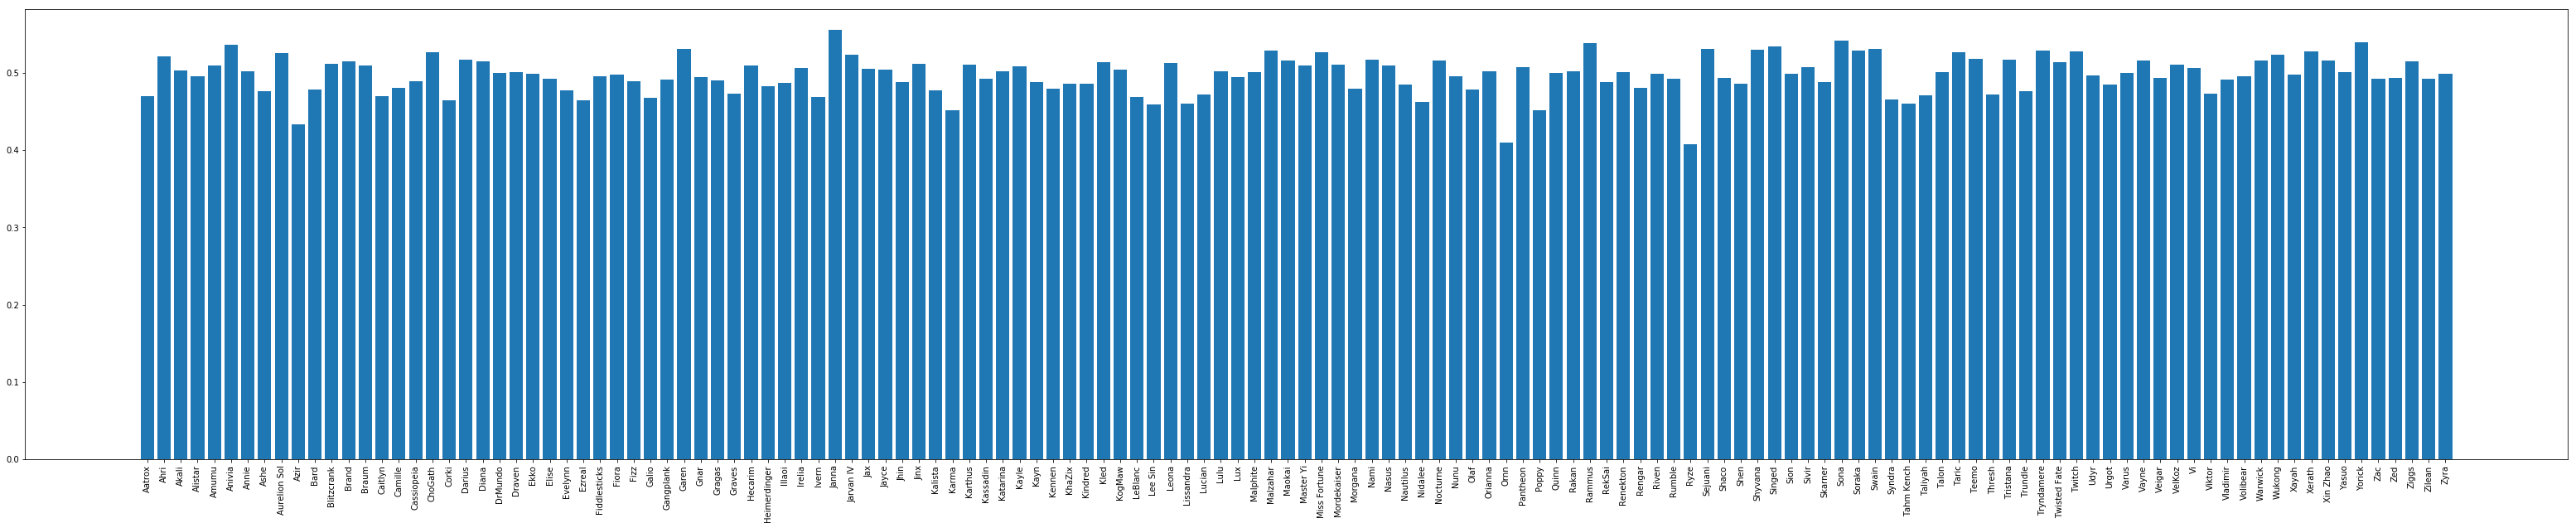

In [242]:
# Ahora saco los ratios en plot

plt.bar(range(len(winrate_champs)), list(winrate_champs.get_values()), align='center')
plt.rcParams["figure.figsize"] = [55,10]
plt.xticks(range(len(winrate_champs)), list(winrate_champs.keys()), rotation='vertical')
plt.savefig('imagenes/barplot Winrate Champs.png')

plt.show()

Como se puede observar, la diferencia de winrate no es demasiado grande

3) ¿El lado afecta?

Una creencia muy extendida por la comunidad es que si se empieza en el lado de arriba (equipo rojo, 2) se tiene más propensión a perder la partida por tener una peor visión.
Ahora, con las 51490 partidas, vamos a ver si esto es verdad de una manera muy sencilla

In [244]:
df_t1.shape[0] / df_t2.shape[0]

1.0261283595010429

Como se puede observar, los que juegan en el equipo 1 tienen una ligerísima ventaja respecto a los del equipo 2

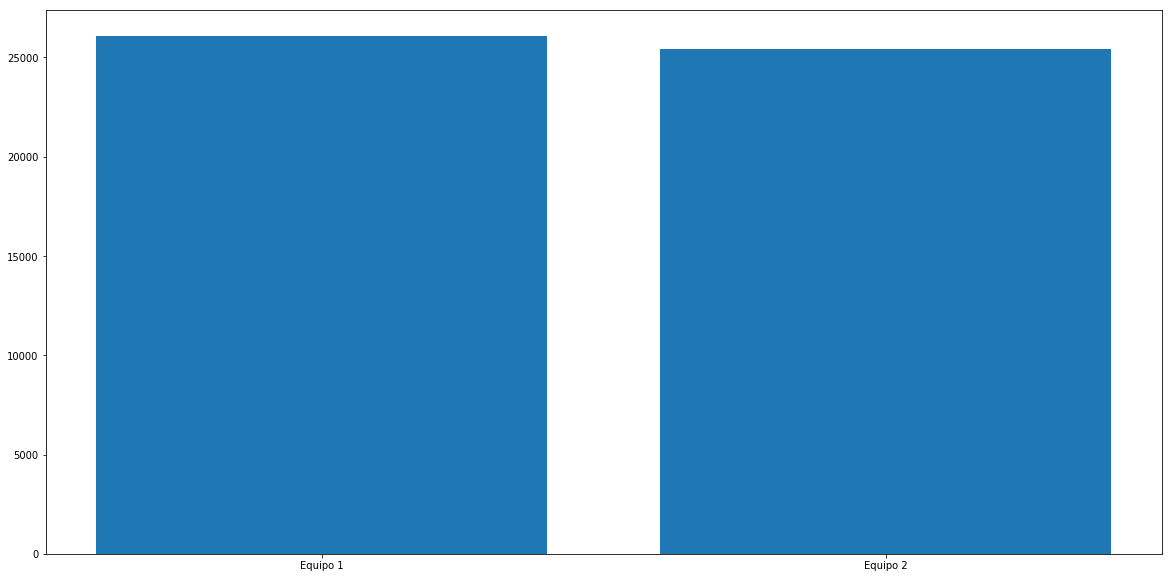

In [275]:
# Visualización de las partidas ganadas en gráfico:
import numpy as np

bars = ('Equipo 1', 'Equipo 2')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.rcParams["figure.figsize"] = [20,10]
plt.bar(y_pos, [df_t1.shape[0], df_t2.shape[0]])

plt.savefig('imagenes/winrate por equipo.png')

4) ¿Como de importantes son los primeros objetivos para los equipos?

El League of Legends en el fondo es un juego donde hay que conseguir derribar el nexo enemigo, y para ello primero hay que conseguir una serie de objetivos. Algunos son obligatorios,
como las torres, mientras que otros son opcionales pero ayudan a aumentar el poder del personaje, como los dragones por ejemplo.
Por lo tanto, considero importante ver si a algún equipo le resulta especialmente interesante el derribar algún objetivo porque ello lleve a la victoria.

4.1 Torres

In [294]:
#Hacemos un dataframe nuevo con las torres de cada partida y el ganador

df_torres_winner = pd.DataFrame()

df_torres_winner['Tower1'] = games.t1_towerKills
df_torres_winner['Tower2'] = games.t2_towerKills
df_torres_winner['Winner'] = games.winner

df_torres_winner.head()

,Tower1,Tower2,Winner
0,11,5,1
1,10,2,1
2,8,2,1
3,9,0,1
4,9,3,1


In [297]:
# Ahora que tengo esto, vamos con las correlaciones entre estas 3...
# Como winner es categórica no me la correlaciona, por lo que la convierto antes

df_torres_winner['Winner'] = df_torres_winner['Winner'].astype('float')

df_torres_winner.corr().style.background_gradient(cmap='coolwarm')

,Tower1,Tower2,Winner
Tower1,1,-0.549123,-0.771541
Tower2,-0.549123,1,0.785813
Winner,-0.771541,0.785813,1


Como se puede observar, la correlación entre tirar tú más torres y ganar está en ambos casos en un 77-78%, lo cual es normal porque es en lo que se basa el juego y tirando menos torres
rara vez se gana

4.2 Inhibidores

Si tirar muchas torres es importante, destruir inhibidores no se queda atrás, puesto que eso significa que llevas bastante delantera en la partida, además de darte beneficios.
Veamos las correlaciones entre ello con un nuevo dataframe

In [300]:
df_inh_winner = pd.DataFrame()

df_inh_winner['Inh1'] = games.t1_inhibitorKills
df_inh_winner['Inh2'] = games.t2_inhibitorKills
df_inh_winner['Winner'] = games.winner

df_inh_winner.head()

,Inh1,Inh2,Winner
0,1,0,1
1,4,0,1
2,1,0,1
3,2,0,1
4,2,0,1


In [303]:
df_inh_winner['Winner'] = df_torres_winner['Winner'].astype('float')
df_inh_winner.corr().style.background_gradient(cmap='coolwarm')

,Inh1,Inh2,Winner
Inh1,1,-0.408924,-0.649405
Inh2,-0.408924,1,0.660452
Winner,-0.649405,0.660452,1


Destruir más inhibidores tiene menor impacto en la partida que destruir muchas torres.
Será interesante ver las relaciones entre inhibidores y torres...

In [305]:
df_inh_turret_winner = pd.DataFrame()

df_inh_turret_winner['Inh1'] = games.t1_inhibitorKills
df_inh_turret_winner['Inh2'] = games.t2_inhibitorKills
df_inh_turret_winner['Tower1'] = games.t1_towerKills
df_inh_turret_winner['Tower2'] = games.t2_towerKills
df_inh_turret_winner['Winner'] = games.winner

df_inh_turret_winner.head(1)

,Inh1,Inh2,Tower1,Tower2,Winner
0,1,0,11,5,1


In [307]:
df_inh_turret_winner['Winner'] = df_torres_winner['Winner'].astype('float')
df_inh_turret_winner.corr().style.background_gradient(cmap='coolwarm')

,Inh1,Inh2,Tower1,Tower2,Winner
Inh1,1,-0.408924,0.824471,-0.467867,-0.649405
Inh2,-0.408924,1,-0.4696,0.825834,0.660452
Tower1,0.824471,-0.4696,1,-0.549123,-0.771541
Tower2,-0.467867,0.825834,-0.549123,1,0.785813
Winner,-0.649405,0.660452,-0.771541,0.785813,1


Se puede apreciar una relación muy fuerte entre quien destruye más inhibidores y quien destruye más torres, lo cual coincide con la mecánica del juego.

Pero ahora, saliendo de lo más obvio, vamos a ver si tiene correlación el hecho de LA PRIMERA TORRE o EL PRIMER INHIBIDOR en el resultado de la partida

4.3) Primera Torre Vs Primer Inhibidor

In [315]:
df_first_inh_turret_winner = pd.DataFrame()

df_first_inh_turret_winner['Tower'] = games.firstTower
df_first_inh_turret_winner['Inh'] = games.firstInhibitor
df_first_inh_turret_winner['Win'] = games.winner

df_first_inh_turret_winner.head(1)

,Tower,Inh,Win
0,1,1,1


In [317]:
df_first_inh_turret_winner['Win'] = df_first_inh_turret_winner['Win'].astype('float')
df_first_inh_turret_winner['Inh'] = df_first_inh_turret_winner['Inh'].astype('float')
df_first_inh_turret_winner['Tower'] = df_first_inh_turret_winner['Tower'].astype('float')
df_first_inh_turret_winner.corr().style.background_gradient(cmap='coolwarm')

,Tower,Inh,Win
Tower,1,0.380326,0.375697
Inh,0.380326,1,0.536437
Win,0.375697,0.536437,1


Como se puede observar, tirar la primera torre tiene una correlación del 37% únicamente, mientras que tirar el primer inhibidor tiene una correlación del 53%.
Esto lo que nos indica es la débil correlación de empezar ganando, pero la fuerza que tiene la correlación si se tira el primer inhibidor

4.4) Dragones, Barones y Heraldo